# Simple data visualization

In [2]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open('output/performance_scores/330_20200809.json') as f:
    performance_scores = json.load(f)

In [11]:
df = pd.DataFrame(performance_scores).transpose().sort_index()

In [18]:
column_order = [
    'best_pitch_slope_score_lower_constituents_with_pauses',
    'best_pitch_slope_score_middle_constituents_with_pauses',
    'best_pitch_slope_score_higher_constituents_with_pauses',
    'best_pitch_slope_score_lower_constituents_no_pauses',
    'best_pitch_slope_score_middle_constituents_no_pauses',
    'best_pitch_slope_score_higher_constituents_no_pauses',
    'best_duration_score_lower_constituents_with_pauses',
    'best_duration_score_middle_constituents_with_pauses',
    'best_duration_score_higher_constituents_with_pauses',
    'best_duration_score_lower_constituents_no_pauses',
    'best_duration_score_middle_constituents_no_pauses',
    'best_duration_score_higher_constituents_no_pauses'
]
df = df[column_order]

In [34]:
session_to_median_wcpm = {}
with open('data/moby-passages-36/data-330-child/WCPM.csv') as f:
    next(f)
    for line in f:
        session, response, value = line.strip().split(',')
        values = sorted([int(v) for v in value[1:-1].split('\t') if v])

        median_wcpm = values[len(values) // 2]
#         high_wcpm = sum()
        session_to_median_wcpm[session] = median_wcpm

In [46]:
session_to_median_wcpm_list = list(session_to_median_wcpm.items())
assert [x[0] for x in session_to_median_wcpm_list] == list(df.index)
df['mean_wcpm'] = [x[1] for x in session_to_median_wcpm_list]

/Users/ycm/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


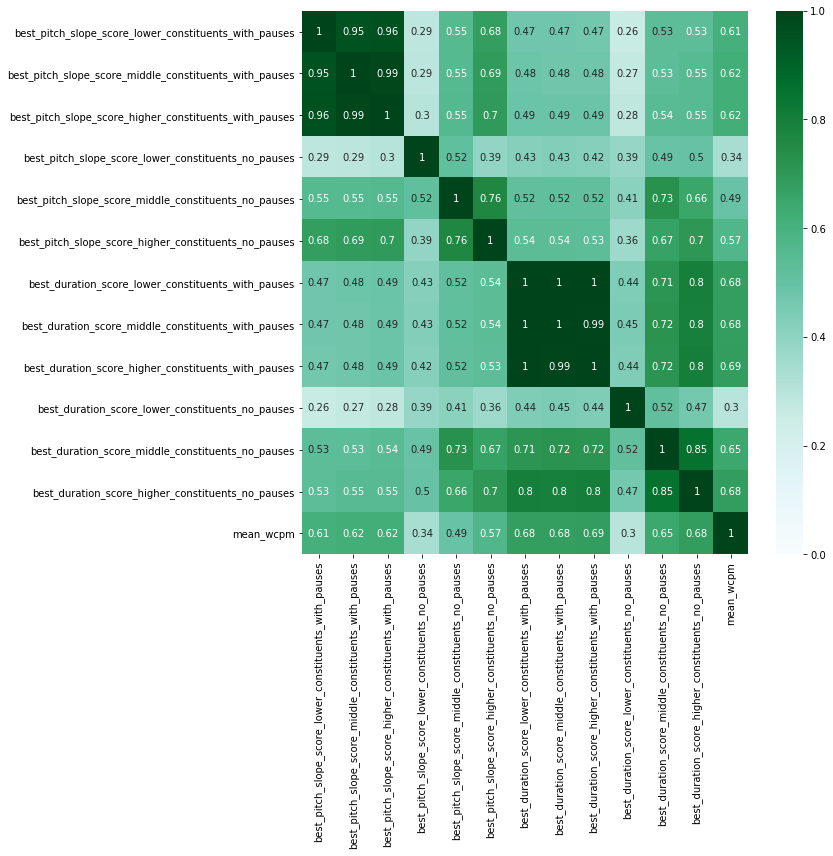

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='BuGn', vmin=0)
plt.show()